In [29]:
import pandas as pd
df=pd.read_csv("D:/Data Engineer Vyshu/customer_shopping_data.csv[1]/customer_shopping_data.csv")

In [5]:
df.shape

(99457, 10)

In [6]:
# Display the first 5 rows
df.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [7]:
# Show the data types of each column
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [8]:
# Find the number of unique values in the gender column
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [9]:
# Display the maximum and minimum age of customers
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [10]:
print(df['age'].max())
print(df['age'].min())

69
18


In [11]:
# Count null values in each column
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [12]:
# Filter transactions where payment_method is "cash"
filter_df=df[df['payment_method']=='Cash']

In [13]:
filter_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
10,I306368,C240286,Female,36,Food & Beverage,2,10.46,Cash,25/12/2022,Metrocity
13,I179802,C312861,Male,25,Clothing,2,600.16,Cash,17/11/2022,Cevahir AVM
...,...,...,...,...,...,...,...,...,...,...
99449,I134399,C953724,Male,65,Clothing,1,300.08,Cash,1/1/2023,Kanyon
99450,I170504,C226974,Female,28,Books,1,15.15,Cash,28/02/2023,Zorlu Center
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,9/10/2021,Metropol AVM
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul


In [14]:
# Filter rows for transactions at "MetroCity Mall"

transaction_filter=df[df["shopping_mall"]=="Metrocity"]

In [15]:
transaction_filter

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
10,I306368,C240286,Female,36,Food & Beverage,2,10.46,Cash,25/12/2022,Metrocity
12,I640508,C225330,Female,67,Toys,4,143.36,Debit Card,31/07/2022,Metrocity
16,I294687,C300786,Male,65,Books,2,30.30,Debit Card,16/01/2021,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99405,I651573,C425890,Male,56,Shoes,3,1800.51,Debit Card,2/8/2022,Metrocity
99408,I949512,C217355,Female,47,Clothing,2,600.16,Credit Card,21/02/2021,Metrocity
99424,I549710,C541824,Female,34,Technology,3,3150.00,Cash,13/01/2021,Metrocity
99433,I403904,C142643,Male,28,Toys,1,35.84,Credit Card,2/11/2022,Metrocity


In [16]:
# Count the number of customers by gender
female_count=(df["gender"]=="Female").sum()
male_count=(df["gender"]=="Male").sum()

In [17]:
print(female_count)
print(male_count)

59482
39975


In [18]:
# Rename the invoice_no column to invoice_number
df.rename(columns={'invoice_no': 'invoice_number'}, inplace=True)

In [19]:
df["invoice_number"]

0        I138884
1        I317333
2        I127801
3        I173702
4        I337046
          ...   
99452    I219422
99453    I325143
99454    I824010
99455    I702964
99456    I232867
Name: invoice_number, Length: 99457, dtype: object

 ####Intermediate-Level (Filtering, Grouping, Aggregation)

In [30]:
#Create a column total_price = quantity × price
df["total_price"]=df['quantity']*df['price']

In [21]:
df["total_price"]

0         7502.00
1         5401.53
2          300.08
3        15004.25
4          242.40
           ...   
99452      293.25
99453       20.92
99454       20.92
99455    16800.00
99456      105.57
Name: total_price, Length: 99457, dtype: float64

In [22]:
df.columns

Index(['invoice_number', 'customer_id', 'gender', 'age', 'category',
       'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall',
       'total_price'],
      dtype='object')

In [23]:
# Find the average price by category
df.groupby("category")["price"].mean()

category
Books                45.568621
Clothing            901.084021
Cosmetics           122.448626
Food & Beverage      15.671948
Shoes              1807.388568
Souvenir             34.894345
Technology         3156.935548
Toys                107.733185
Name: price, dtype: float64

In [24]:
# Group by payment_method and sum quantity
df.groupby("payment_method")["quantity"].sum()

payment_method
Cash           133370
Credit Card    105045
Debit Card      60297
Name: quantity, dtype: int64

In [25]:
# Calculate average age grouped by gender
df.groupby("gender")["age"].mean()

gender
Female    43.453515
Male      43.387767
Name: age, dtype: float64

<Axes: title={'center': 'Transaction counts per shopping_mall'}, xlabel='shopping_mall', ylabel='transaction counts'>

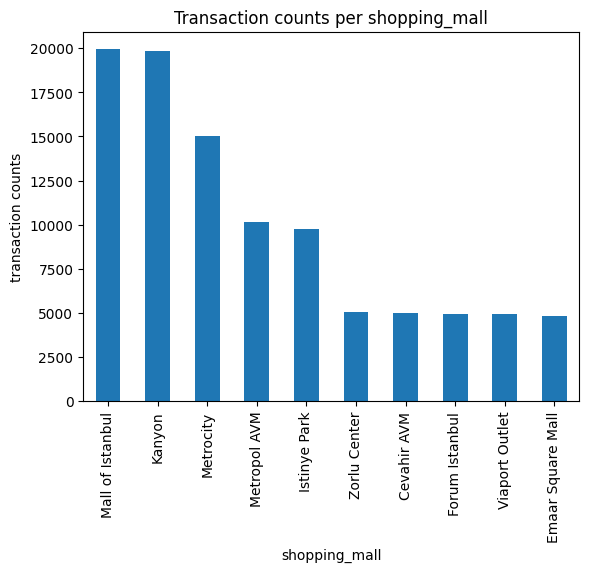

In [26]:
# Create a bar chart of transaction counts per shopping_mall
import matplotlib.pyplot as pt
mall_counts=df["shopping_mall"].value_counts()
pt.xlabel("shopping_mall")
pt.ylabel("transaction counts")
pt.title("Transaction counts per shopping_mall")
mall_counts.plot(kind="bar")



In [27]:
df.columns

Index(['invoice_number', 'customer_id', 'gender', 'age', 'category',
       'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall',
       'total_price'],
      dtype='object')

In [36]:
# Count the number of invoices per customer_id
df.groupby('customer_id')['invoice_no'].sum()

customer_id
C100004    I178410
C100005    I158163
C100006    I262373
C100012    I334895
C100019    I202043
            ...   
C999886    I325647
C999910    I256358
C999974    I143068
C999976    I219600
C999995    I200805
Name: invoice_no, Length: 99457, dtype: object

In [ ]:
_customers=df.groupby("customer_id")["total_price"].sum()

In [ ]:
_customers.head(5)

In [ ]:
# List top 5 customers by total_price
top_customers=df.groupby("customer_id")["total_price"].sum().sort_values(ascending=False)

In [ ]:
top_customers.head(5)

In [ ]:
df.columns

In [ ]:
# Find top 3 most purchased category values
df.groupby('category')['quantity'].sum().sort_values(ascending=False).head(3)

In [ ]:
df.head(5)

In [31]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"],dayfirst=True)


In [ ]:
df["invoice_date"] 

In [37]:
# Extract month from invoice_date and create a month column
df['month'] = df['invoice_date'].dt.month

In [ ]:
df["month"]

#### Advanced-Level (Date Logic, Analysis, Visualization)

In [ ]:
# Find the customer who spent the most
df.groupby("customer_id")['total_price'].max().head(1)

In [ ]:
# Count transactions made on weekends
# Extract day of week (Monday = 0, Sunday = 6)
df['day_of_week'] = df['invoice_date'].dt.dayofweek

# Filter weekends (Saturday = 5, Sunday = 6)
weekend_transactions = df[df['day_of_week'].isin([5, 6])]

In [ ]:
df['day_of_week']

In [ ]:
weekend_count = len(weekend_transactions)

In [ ]:
weekend_count

In [40]:
# Find which shopping mall had the highest sales in December
dec_sales=df[df["month"]==12]


In [41]:
dec_sales

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,day_of_week,month
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,6,12
10,I306368,C240286,Female,36,Food & Beverage,2,10.46,Cash,2022-12-25,Metrocity,20.92,6,12
24,I174250,C204553,Female,42,Books,5,75.75,Cash,2022-12-16,Metrocity,378.75,4,12
39,I473411,C452806,Male,24,Clothing,1,300.08,Cash,2022-12-19,Metropol AVM,300.08,0,12
45,I117291,C134449,Male,46,Books,5,75.75,Credit Card,2022-12-09,Zorlu Center,378.75,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99374,I221532,C956894,Male,36,Technology,3,3150.00,Credit Card,2021-12-24,Metropol AVM,9450.00,4,12
99388,I705676,C154530,Female,27,Technology,2,2100.00,Cash,2021-12-06,Metrocity,4200.00,0,12
99416,I143010,C922388,Male,55,Food & Beverage,5,26.15,Cash,2021-12-22,Cevahir AVM,130.75,2,12
99428,I184085,C175610,Female,33,Cosmetics,3,121.98,Credit Card,2021-12-11,Mall of Istanbul,365.94,5,12


In [42]:
highest_sales=dec_sales.groupby("shopping_mall")["total_price"].sum().sort_values(ascending=False).head(1)

In [43]:
highest_sales

shopping_mall
Kanyon    3965478.96
Name: total_price, dtype: float64

In [ ]:
# Calculate the average transaction value

avg_transaction_val=df["total_price"].mean()

In [ ]:
print(avg_transaction_val)

In [ ]:
# Create a pivot table with average price by category and gender
pivot_table = df.pivot_table(values='total_price', index='category', columns='gender', aggfunc='mean')

In [ ]:
pivot_table

In [ ]:
# Plot daily revenue trends
daily_trends=df.groupby('invoice_date')['total_price'].sum()

In [ ]:
daily_trends

In [ ]:

daily_trends.plot(kind="line")

In [32]:
# Determine which day of the week has the most transactions
df['day_of_week'] = df['invoice_date'].dt.dayofweek

In [33]:
transactions_per_day=df['day_of_week'].value_counts()
print(transactions_per_day)

day_of_week
0    14383
4    14347
1    14217
6    14140
3    14129
5    14121
2    14120
Name: count, dtype: int64


In [34]:
most_transactions_day = transactions_per_day.idxmax()

# Map the day number to its name (0 = Monday, 6 = Sunday)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
most_transactions_day_name = days[most_transactions_day]

In [35]:
most_transactions_day_name

'Monday'

In [ ]:
print(most_transactions_day)

In [ ]:
# Create age buckets (e.g., 0–20, 21–40, 41–60, 61+)
# Create age buckets in an easy way
df['age_bucket'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '61+'])



In [ ]:
df['age_bucket']

In [ ]:
df["invoice_date"]=pd.to_datetime(df["invoice_date"],dayfirst=True)


In [ ]:
# Add a column is_weekend based on invoice_date
df["is_weekend"]=df["invoice_date"].dt.dayofweek>=5


In [ ]:
df["is_weekend"]


In [ ]:
df.head(50)

In [ ]:
# Find the most popular payment_method per shopping_mall


In [ ]:
# Find the most common payment_method per shopping_mall
most_popular_payment = (
    df.groupby('shopping_mall')['payment_method']
    .agg(lambda x: x.value_counts().idxmax())
)

print(most_popular_payment)
